In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler


### PROCESSING

In [2]:
df = pd.read_csv('sample_data/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

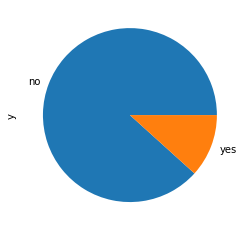

In [4]:
df.y.value_counts(normalize=True).plot.pie()

In [5]:
df.shape

(45211, 17)

In [25]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
unknown = []
total = 0
for col in df.columns:
  if df[col].dtypes == 'O':
    s = df[df[col] == 'unknown'].shape
    print(col, s)
    total+=s[0]
    unknown.append(s)
  
print('Le total de ligne avec unknow est {}'.format(total))

job (288, 17)
marital (0, 17)
education (1857, 17)
default (0, 17)
housing (0, 17)
loan (0, 17)
contact (13020, 17)
month (0, 17)
poutcome (36959, 17)
y (0, 17)
Le total de ligne avec unknow est 52124


In [9]:
pd.crosstab(df.education, df.y, normalize=False, margins=True) * 100

y,no,yes,All
education,,,
primary,786500,59100,845600
secondary,2075200,245000,2320200
tertiary,1130500,224800,1355300
All,3992200,528900,4521100


In [8]:
cond1 = df['education'] == 'unknown'
cond2 = df['y'] == 'no'
cond3 = df['y'] == 'yes'
df.loc[((cond1) & (cond2)), 'education'] = 'primary'
df.loc[((cond1) & (cond3)), 'education'] = 'tertiary'


In [10]:
pd.crosstab(df.contact, df.y, normalize=True, margins=True) * 100

y,no,yes,All
contact,,,
cellular,55.110482,9.663577,64.774059
telephone,5.565017,0.862622,6.427639
unknown,27.626020,1.172281,28.798301
All,88.301520,11.698480,100.000000


In [11]:
cond1 = df['contact'] == 'unknown'
df.loc[((cond1) & (cond2)), 'contact'] = 'cellular'
df.loc[((cond1) & (cond3)), 'contact'] = 'telephone'

In [12]:
pd.crosstab(df.poutcome, df.y, normalize=True, margins=True) * 100

y,no,yes,All
poutcome,,,
failure,9.473358,1.366924,10.840282
other,3.390768,0.679038,4.069806
success,1.178917,2.163190,3.342107
unknown,74.258477,7.489328,81.747805
All,88.301520,11.698480,100.000000


In [13]:
cond1 = df['poutcome'] == 'unknown'
df.loc[((cond1) & (cond2)), 'poutcome'] = 'failure'
df.loc[((cond1) & (cond3)), 'poutcome'] = 'success'

In [14]:
pd.crosstab(df.job, df.y, normalize=True, margins=True) * 100

y,no,yes,All
job,,,
admin.,10.041804,1.395678,11.437482
blue-collar,19.959744,1.565991,21.525735
entrepreneur,3.016965,0.272058,3.289023
housemaid,2.501604,0.241092,2.742695
management,18.042069,2.877618,20.919688
retired,3.866316,1.141315,5.007631
self-employed,3.078897,0.413616,3.492513
services,8.371856,0.816173,9.188029
student,1.479728,0.594988,2.074716


In [15]:
cond1 = df['job'] == 'unknown'
df.loc[((cond1) & (cond2)), 'job'] = 'unemployed'
df.loc[((cond1) & (cond3)), 'job'] = 'management'

In [16]:
pd.crosstab(df.job, df.y, normalize=True, margins=True) * 100

y,no,yes,All
job,,,
admin.,10.041804,1.395678,11.437482
blue-collar,19.959744,1.565991,21.525735
entrepreneur,3.016965,0.272058,3.289023
housemaid,2.501604,0.241092,2.742695
management,18.042069,2.952821,20.994891
retired,3.866316,1.141315,5.007631
self-employed,3.078897,0.413616,3.492513
services,8.371856,0.816173,9.188029
student,1.479728,0.594988,2.074716


In [17]:
# unique occurences of marital
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
# unique occurences of education
df.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [19]:
# unique occurences of job
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unemployed', 'retired', 'admin.', 'services', 'self-employed',
       'housemaid', 'student'], dtype=object)

In [20]:
# unique occurences of default
df.default.unique()

array(['no', 'yes'], dtype=object)

In [21]:
# label encoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col]) 

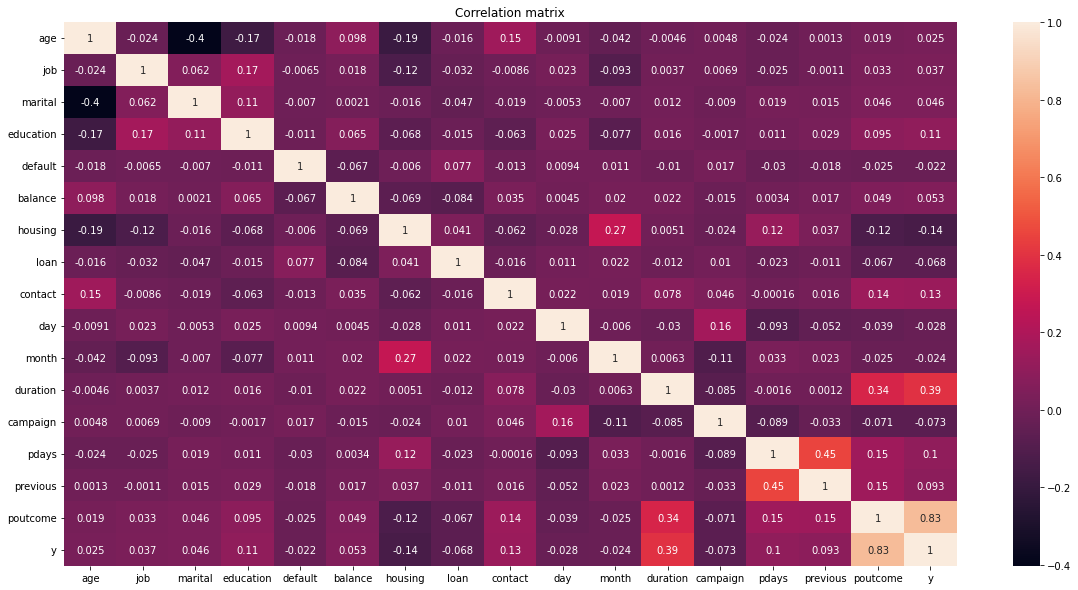

In [22]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.title('Correlation matrix')
plt.show()

In [ ]:
#df = df.drop(['default'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
#df.replace('unknown', np.nan, inplace=True)
#df.dropna()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,9,2,1,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,2,1,1,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,10,2,0,1,0,0,0,5,8,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,0,17,9,977,3,-1,0,2,1
45207,71,5,0,0,1729,0,0,0,17,9,456,2,-1,0,2,1
45208,72,5,1,1,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,668,0,0,1,17,9,508,4,-1,0,0,0


In [23]:
df.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [24]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.328880,1.167725,1.112738,0.018027,1362.272058,0.555838,0.160226,0.075999,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,0.257327,0.116985
std,10.618762,3.256942,0.608230,0.688554,0.133049,3044.765829,0.496878,0.366820,0.265000,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.638551,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,2.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [28]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,1,1,0,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,10,2,0,0,1,0,0,0,5,8,198,1,-1,0,0,0
5,35,4,1,2,0,231,1,0,0,5,8,139,1,-1,0,0,0
6,28,4,2,2,0,447,1,1,0,5,8,217,1,-1,0,0,0
7,42,2,0,2,1,2,1,0,0,5,8,380,1,-1,0,0,0
8,58,5,1,0,0,121,1,0,0,5,8,50,1,-1,0,0,0
9,43,9,2,1,0,593,1,0,0,5,8,55,1,-1,0,0,0


### VISUALIZATIONS

1    27214
2    12790
0     5207
Name: marital, dtype: int64


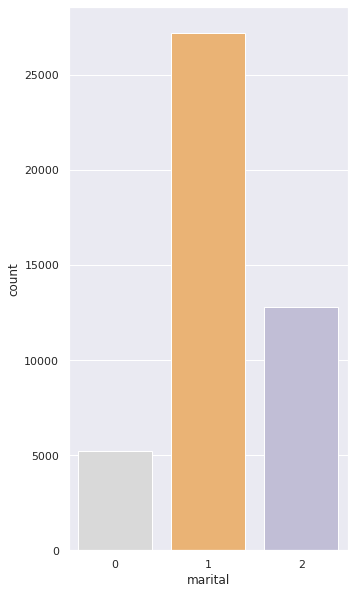

In [29]:
print(df.marital.value_counts())
# diagramme en bande de cette variable
plt.figure(figsize=[5,10])
sns.set(style='darkgrid')
ax = sns.countplot(x='marital', data=df, palette='Set3_r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


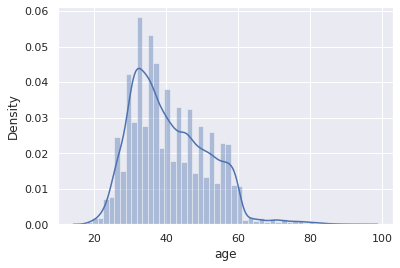

In [30]:
sns.distplot(df.age)

1    23202
2    13553
0     8456
Name: education, dtype: int64


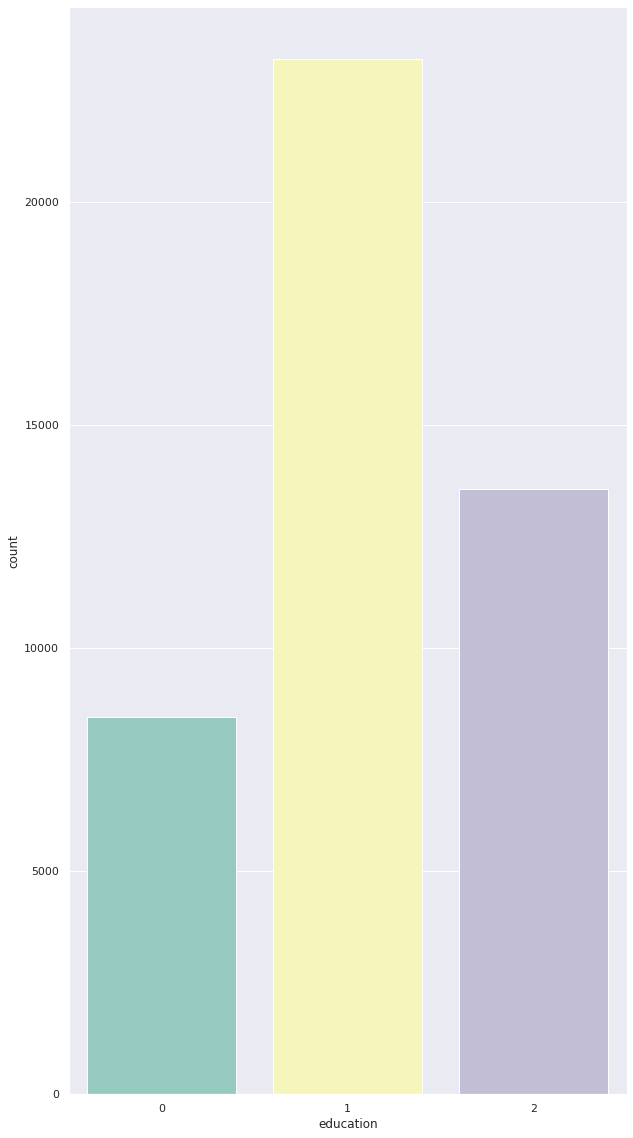

In [31]:
print(df.education.value_counts())
# diagramme en bande de cette variable
plt.figure(figsize=[10,20])
sns.set(style='darkgrid')
ax = sns.countplot(x='education', data=df, palette='Set3')

### K-nearest neighbors (KNN)

In [32]:
X = df.drop('y', 1)
X.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0
3,47,1,1,0,0,1506,1,0,0,5,8,92,1,-1,0,0
4,33,10,2,0,0,1,0,0,0,5,8,198,1,-1,0,0


In [33]:
y = df['y']

In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9575,  403],
       [ 986,  339]])

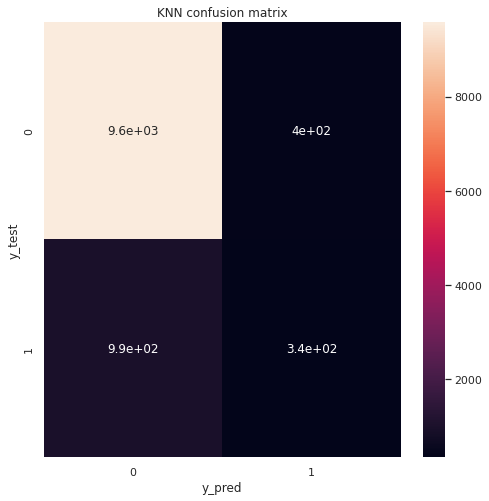

In [39]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, ax=ax)
plt.title('KNN confusion matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [42]:
acc = cm.diagonal().sum()/cm.sum()
acc * 100

87.71122710784748

In [43]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc * 100

87.71122710784748

### Decision tree

In [44]:
# Répartition de survived (**sans** `stratification`) à travers les deux échantillons `train` et `test`
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y)

In [45]:
y_test_sf

26305    0
40790    0
1602     0
31700    0
2765     0
        ..
3579     0
27743    0
29688    0
14898    0
24535    0
Name: y, Length: 11303, dtype: int64

In [46]:
y_train_sf.value_counts(normalize=True)

0    0.882977
1    0.117023
Name: y, dtype: float64

In [47]:
y_test_sf.value_counts(normalize=True)

0    0.883128
1    0.116872
Name: y, dtype: float64

In [48]:
# Répartition de survived (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [49]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24915,58,4,1,2,0,0,1,0,0,18,9,265,1,188,1,0
11794,47,7,0,1,0,287,0,0,0,20,6,63,1,-1,0,0
1279,35,4,2,2,0,797,1,0,0,8,8,81,1,-1,0,0
913,34,0,0,1,0,627,1,0,0,7,8,283,2,-1,0,0
5554,35,0,2,1,0,91,1,0,0,23,8,185,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,41,4,2,2,0,1113,1,1,0,9,6,388,12,-1,0,0
26216,40,7,2,1,0,1547,1,0,0,20,9,405,1,-1,0,2
15941,36,0,2,1,0,22,1,0,0,22,5,77,5,-1,0,0
16952,45,1,1,1,0,79,1,0,0,25,5,98,1,-1,0,0


In [50]:
y_train.value_counts(normalize=True)

0    0.883007
1    0.116993
Name: y, dtype: float64

In [51]:
y_test.value_counts(normalize=True)

0    0.88304
1    0.11696
Name: y, dtype: float64

In [52]:
# Construction de notre abre
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [53]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
print(tree.classes_)
print(tree.max_depth)
print(tree.criterion)

[0 1]
None
gini


In [55]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [56]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0])

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[9789,  192],
       [ 235, 1087]])

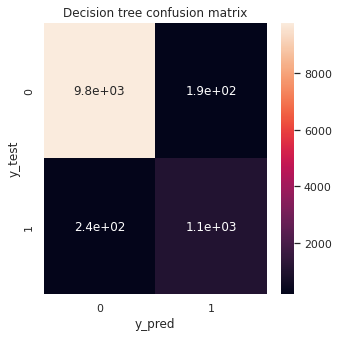

In [58]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax=ax)
plt.title('Decision tree confusion matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [59]:
acc = cm.diagonal().sum()/cm.sum()
acc * 100

96.222241882686

In [60]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc * 100

96.222241882686

In [61]:
score = tree.score(X_test, y_test)
score * 100

96.222241882686

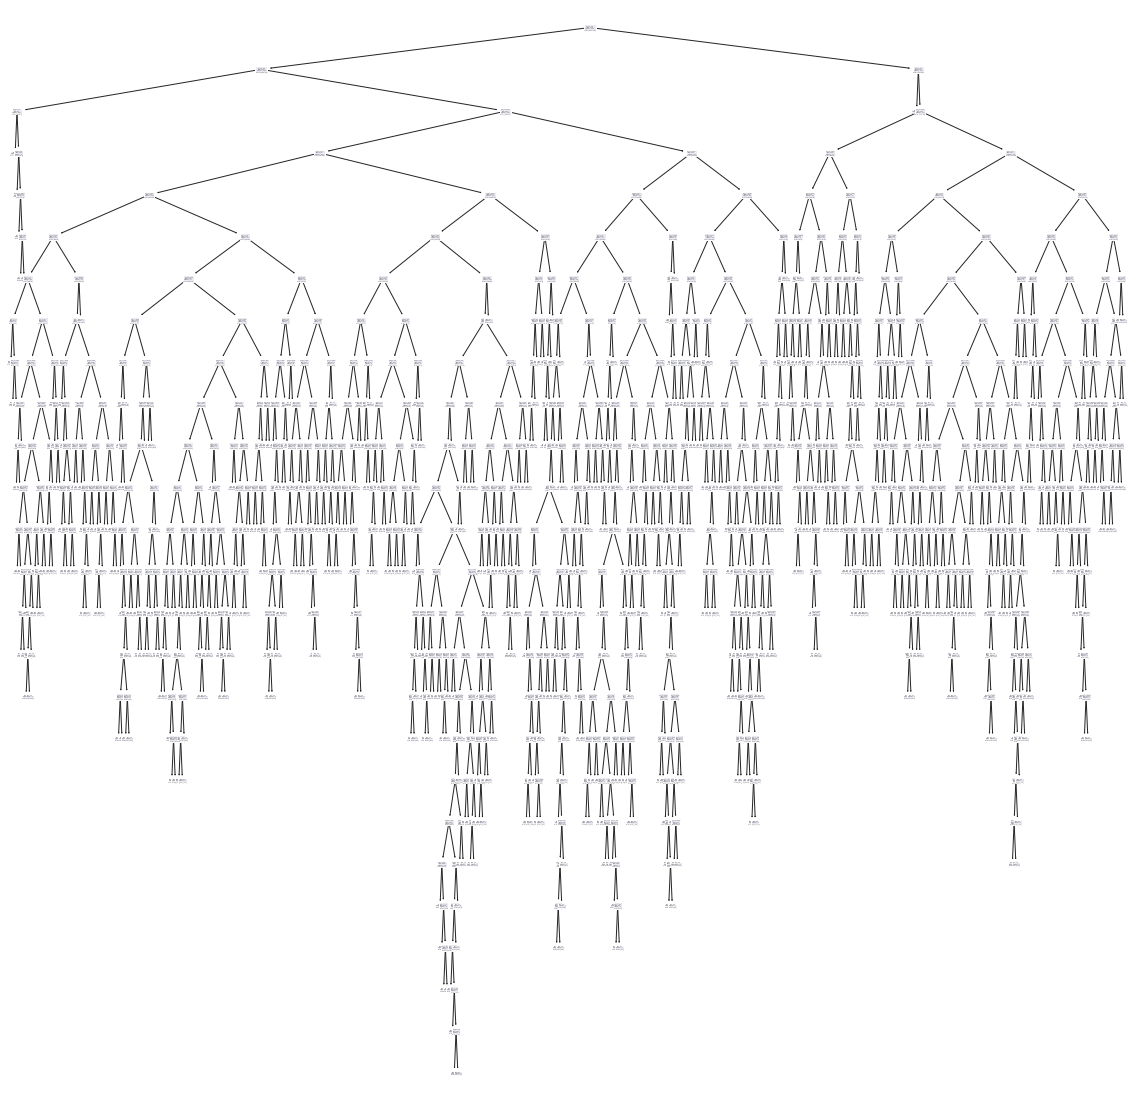

In [62]:
plt.figure(figsize = (20, 20))
tree = plot_tree(tree)

In [63]:
# Optimisation de la profondeur de l'arbre

scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)

In [64]:
scores

[0.9667344952667434,
 0.9693001857913828,
 0.9696540741396089,
 0.968680881181987,
 0.9692117137043262,
 0.9690347695302132,
 0.9690347695302132,
 0.9681500486596479]

In [65]:
tree=DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [66]:
acc = tree.score(X_test, y_test)
acc * 100

96.92117137043262

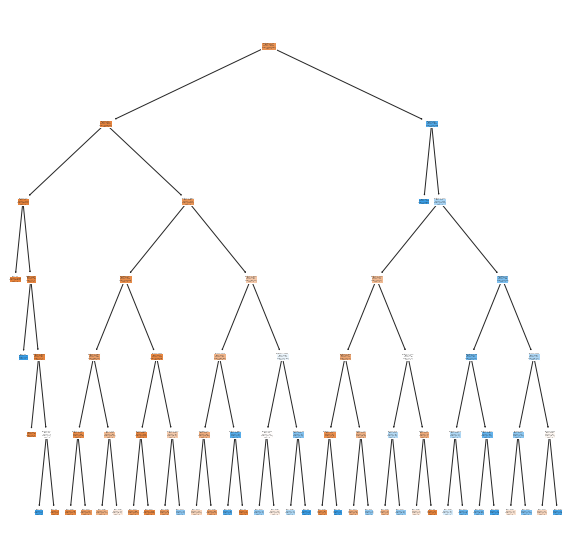

In [67]:
plt.figure(figsize = (10, 10))
tree_titanic = plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'] )

In [68]:
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- poutcome <= 1.50
|   |--- pdays <= 8.50
|   |   |--- pdays <= 1.50
|   |   |   |--- class: 0
|   |   |--- pdays >  1.50
|   |   |   |--- month <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- month >  0.50
|   |   |   |   |--- duration <= 680.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  680.00
|   |   |   |   |   |--- pdays <= 5.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- pdays >  5.00
|   |   |   |   |   |   |--- class: 0
|   |--- pdays >  8.50
|   |   |--- duration <= 365.50
|   |   |   |--- housing <= 0.50
|   |   |   |   |--- duration <= 158.50
|   |   |   |   |   |--- duration <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  158.50
|   |   |   |   |   |--- day <= 21.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- day >  21.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- housing >  0.5

### KMEANS

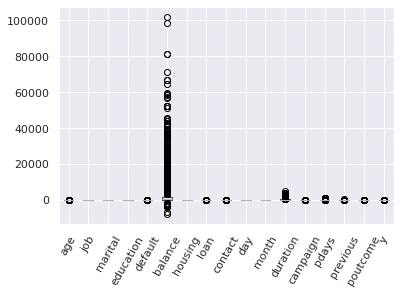

In [69]:
df.boxplot(rot=60)

In [70]:
corr = df.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.024025,-0.403240,-0.169501,-0.017879,0.097783,-0.185513,-0.015655,0.151095,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.019221,0.025155
job,-0.024025,1.000000,0.061960,0.166872,-0.006536,0.017660,-0.122749,-0.032000,-0.008560,0.023364,-0.092816,0.003750,0.006895,-0.024860,-0.001105,0.033223,0.036820
marital,-0.403240,0.061960,1.000000,0.112502,-0.007023,0.002122,-0.016096,-0.046893,-0.018568,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,0.045885,0.045588
education,-0.169501,0.166872,0.112502,1.000000,-0.010836,0.065041,-0.067956,-0.015034,-0.063323,0.024853,-0.077089,0.015630,-0.001735,0.011207,0.029399,0.095252,0.106018
default,-0.017879,-0.006536,-0.007023,-0.010836,1.000000,-0.066745,-0.006025,0.077234,-0.013136,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,-0.024921,-0.022419
balance,0.097783,0.017660,0.002122,0.065041,-0.066745,1.000000,-0.068768,-0.084350,0.035071,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,0.048580,0.052838
housing,-0.185513,-0.122749,-0.016096,-0.067956,-0.006025,-0.068768,1.000000,0.041323,-0.061795,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.122391,-0.139173
loan,-0.015655,-0.032000,-0.046893,-0.015034,0.077234,-0.084350,0.041323,1.000000,-0.015596,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,-0.066770,-0.068185
contact,0.151095,-0.008560,-0.018568,-0.063323,-0.013136,0.035071,-0.061795,-0.015596,1.000000,0.021524,0.018513,0.078493,0.045760,-0.000165,0.015799,0.139973,0.134533
day,-0.009120,0.023364,-0.005261,0.024853,0.009424,0.004503,-0.027982,0.011370,0.021524,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,-0.038583,-0.028348


In [71]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

In [72]:
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.00,-0.02,-0.40,-0.17,-0.02,0.10,-0.19,-0.02,0.15,-0.01,-0.04,-0.00,0.00,-0.02,0.00,0.02,0.03
job,-0.02,1.00,0.06,0.17,-0.01,0.02,-0.12,-0.03,-0.01,0.02,-0.09,0.00,0.01,-0.02,-0.00,0.03,0.04
marital,-0.40,0.06,1.00,0.11,-0.01,0.00,-0.02,-0.05,-0.02,-0.01,-0.01,0.01,-0.01,0.02,0.01,0.05,0.05
education,-0.17,0.17,0.11,1.00,-0.01,0.07,-0.07,-0.02,-0.06,0.02,-0.08,0.02,-0.00,0.01,0.03,0.10,0.11
default,-0.02,-0.01,-0.01,-0.01,1.00,-0.07,-0.01,0.08,-0.01,0.01,0.01,-0.01,0.02,-0.03,-0.02,-0.02,-0.02
balance,0.10,0.02,0.00,0.07,-0.07,1.00,-0.07,-0.08,0.04,0.00,0.02,0.02,-0.01,0.00,0.02,0.05,0.05
housing,-0.19,-0.12,-0.02,-0.07,-0.01,-0.07,1.00,0.04,-0.06,-0.03,0.27,0.01,-0.02,0.12,0.04,-0.12,-0.14
loan,-0.02,-0.03,-0.05,-0.02,0.08,-0.08,0.04,1.00,-0.02,0.01,0.02,-0.01,0.01,-0.02,-0.01,-0.07,-0.07
contact,0.15,-0.01,-0.02,-0.06,-0.01,0.04,-0.06,-0.02,1.00,0.02,0.02,0.08,0.05,-0.00,0.02,0.14,0.13
day,-0.01,0.02,-0.01,0.02,0.01,0.00,-0.03,0.01,0.02,1.00,-0.01,-0.03,0.16,-0.09,-0.05,-0.04,-0.03


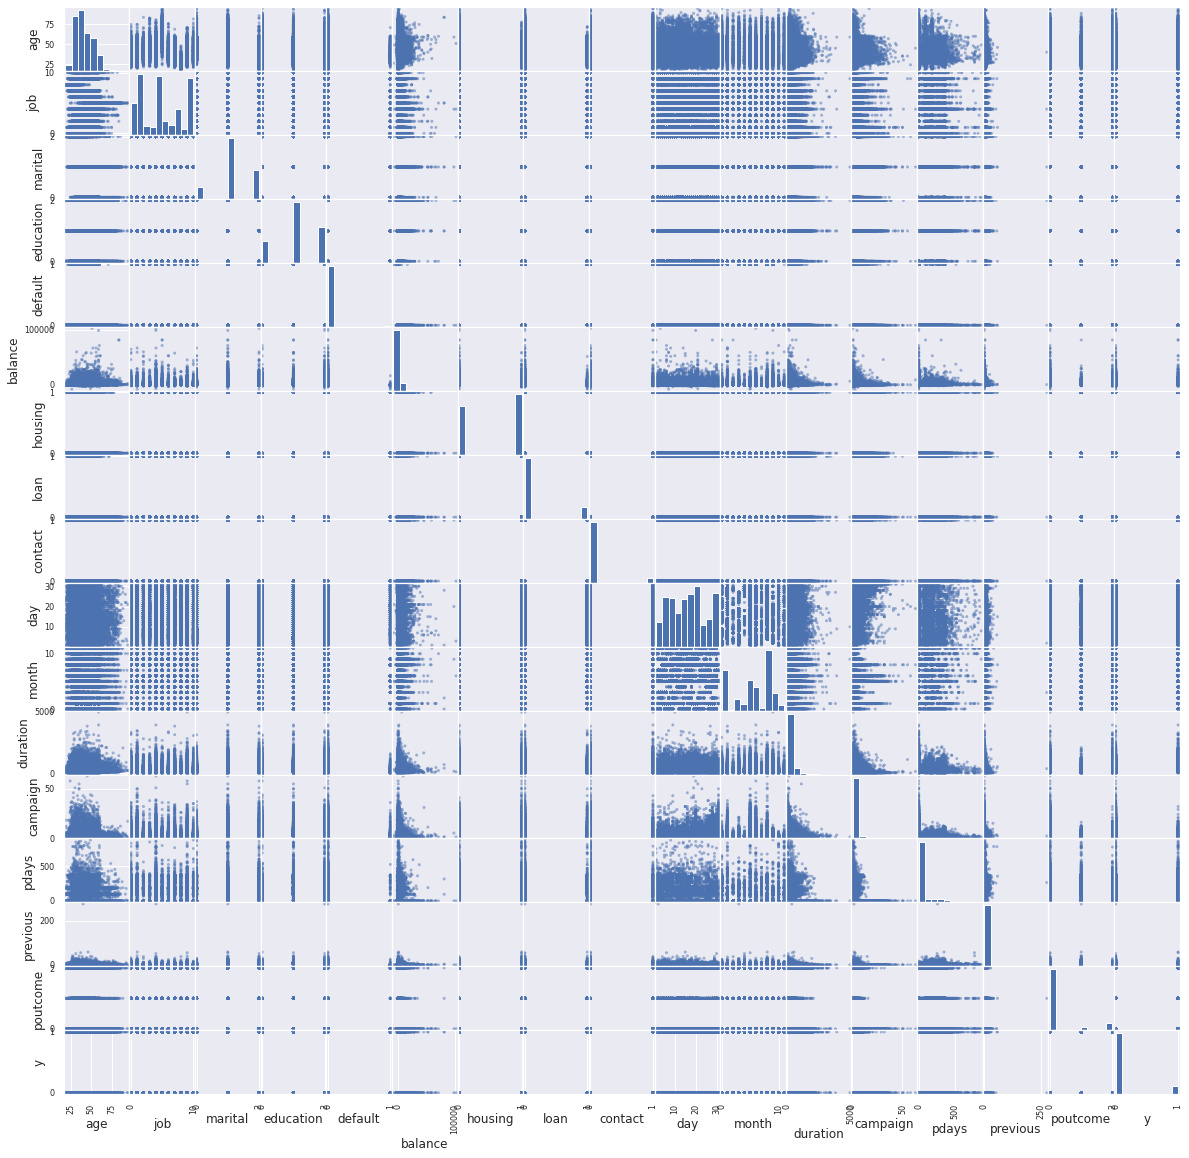

In [73]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(df, figsize = (20,20))

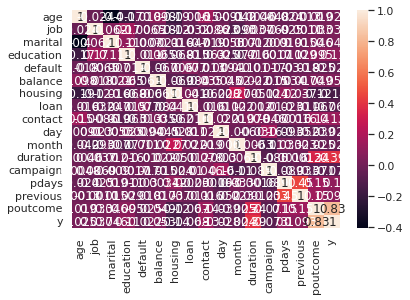

In [74]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [75]:
min_max = MinMaxScaler()
min_max

MinMaxScaler()

In [76]:
min_max.fit(df)

MinMaxScaler()

In [77]:
print(min_max.data_min_)
print(min_max.data_max_)

[ 1.800e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -8.019e+03
  0.000e+00  0.000e+00  0.000e+00  1.000e+00  0.000e+00  0.000e+00
  1.000e+00 -1.000e+00  0.000e+00  0.000e+00  0.000e+00]
[9.50000e+01 1.00000e+01 2.00000e+00 2.00000e+00 1.00000e+00 1.02127e+05
 1.00000e+00 1.00000e+00 1.00000e+00 3.10000e+01 1.10000e+01 4.91800e+03
 6.30000e+01 8.71000e+02 2.75000e+02 2.00000e+00 1.00000e+00]


In [78]:
min_max.transform(df)


array([[0.51948052, 0.4       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.33766234, 0.9       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19480519, 0.2       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7012987 , 0.5       , 0.5       , ..., 0.01090909, 1.        ,
        1.        ],
       [0.50649351, 0.1       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.24675325, 0.2       , 0.5       , ..., 0.04      , 0.5       ,
        0.        ]])

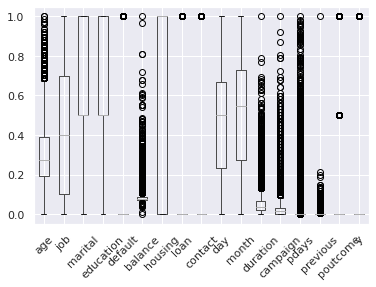

In [79]:
pd.DataFrame(min_max.transform(df), columns=df.columns, index=df.index).boxplot(rot = 45)

In [80]:
df_minmax = min_max.fit_transform(df)
df_minmax

array([[0.51948052, 0.4       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.33766234, 0.9       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19480519, 0.2       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7012987 , 0.5       , 0.5       , ..., 0.01090909, 1.        ,
        1.        ],
       [0.50649351, 0.1       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.24675325, 0.2       , 0.5       , ..., 0.04      , 0.5       ,
        0.        ]])

In [81]:
df_scale = scale(df)
df_scale

array([[ 1.60696496, -0.10097931, -0.27576178, ..., -0.25194037,
        -0.40298988, -0.36398261],
       [ 0.28852927,  1.43421995,  1.3683719 , ..., -0.25194037,
        -0.40298988, -0.36398261],
       [-0.74738448, -0.71505901, -0.27576178, ..., -0.25194037,
        -0.40298988, -0.36398261],
       ...,
       [ 2.92540065,  0.20606054, -0.27576178, ...,  1.05047333,
         2.72913588,  2.74738398],
       [ 1.51279098, -1.02209887, -0.27576178, ..., -0.25194037,
        -0.40298988, -0.36398261],
       [-0.37068857, -0.71505901, -0.27576178, ...,  4.52357654,
         1.163073  , -0.36398261]])

In [82]:
pd.DataFrame(df_scale, columns = df.columns, index=df.index).describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,-5.509909e-15,4.638734e-15,7.413736e-15,4.520540e-15,3.070663e-15,1.382298e-14,-1.275129e-14,-1.364199e-14,-9.219436e-15,5.036415e-14,5.560938e-17,1.254699e-14,-1.395817e-13,1.355210e-13,-5.573673e-14,-9.378310e-14
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-1.329139e+00,-1.919895e+00,-1.616068e+00,-1.354899e-01,-3.081149e+00,-1.118674e+00,-4.368035e-01,-2.867929e-01,-1.779108e+00,-1.836794e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,-4.029899e-01,-3.639826e-01
25%,-7.473845e-01,-1.022099e+00,-2.757618e-01,-1.637334e-01,-1.354899e-01,-4.237719e-01,-1.118674e+00,-4.368035e-01,-2.867929e-01,-9.380027e-01,-8.390811e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,-4.029899e-01,-3.639826e-01
50%,-1.823406e-01,-1.009793e-01,-2.757618e-01,-1.637334e-01,-1.354899e-01,-3.002800e-01,8.939154e-01,-4.368035e-01,-2.867929e-01,2.326031e-02,1.586316e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,-4.029899e-01,-3.639826e-01
75%,6.652252e-01,8.201402e-01,1.368372e+00,1.288601e+00,-1.354899e-01,2.158743e-02,8.939154e-01,-4.368035e-01,-2.867929e-01,6.240497e-01,8.237734e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,-4.029899e-01,-3.639826e-01
max,5.091402e+00,1.741260e+00,1.368372e+00,1.288601e+00,7.380625e+00,3.309478e+01,8.939154e-01,2.289359e+00,3.486837e+00,1.825628e+00,1.821486e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,2.729136e+00,2.747384e+00


In [83]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.328880,1.167725,1.112738,0.018027,1362.272058,0.555838,0.160226,0.075999,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,0.257327,0.116985
std,10.618762,3.256942,0.608230,0.688554,0.133049,3044.765829,0.496878,0.366820,0.265000,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.638551,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,2.000000,1.000000


In [84]:
pd.DataFrame(df_minmax, columns=df.columns, index=df.index)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.4,0.5,1.0,0.0,0.092259,1.0,0.0,0.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,0.0,0.0
1,0.337662,0.9,1.0,0.5,0.0,0.073067,1.0,0.0,0.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,0.0,0.0
2,0.194805,0.2,0.5,0.5,0.0,0.072822,1.0,1.0,0.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,0.0,0.0
3,0.376623,0.1,0.5,0.0,0.0,0.086476,1.0,0.0,0.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,0.0,0.0
4,0.194805,1.0,1.0,0.0,0.0,0.072812,0.0,0.0,0.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.9,0.5,1.0,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.0,1.0
45207,0.688312,0.5,0.0,0.0,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.0,1.0
45208,0.701299,0.5,0.5,0.5,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,1.0,1.0
45209,0.506494,0.1,0.5,0.5,0.0,0.078868,0.0,0.0,1.0,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,0.0,0.0


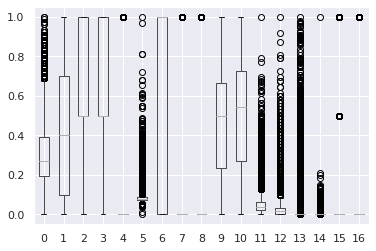

In [85]:
pd.DataFrame(df_minmax).boxplot()

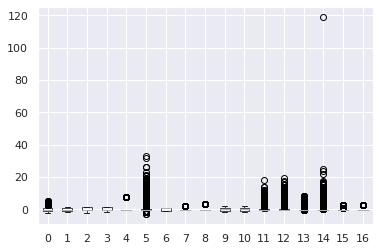

In [86]:
pd.DataFrame(df_scale).boxplot()

In [87]:
# Kmeans sur le df_minmax
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_minmax

KMeans(n_clusters=4, random_state=42)

In [88]:
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=4, random_state=42)

In [89]:
print(kmeans_minmax.n_iter_)
print(kmeans_minmax.labels_)

6
[1 1 2 ... 0 3 3]


In [90]:
# Kmeans sur le df d'origine
kmeans_orig = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_orig.fit(df)
kmeans_orig.labels_

array([0, 0, 0, ..., 3, 0, 3], dtype=int32)

In [91]:
kmeans_minmax.inertia_, kmeans_orig.inertia_

(30996.272645469413, 73160408209.42792)

In [92]:
y_kmeans = kmeans_minmax.predict(df_minmax)
y_kmeans

array([1, 1, 2, ..., 0, 3, 3], dtype=int32)

In [93]:
centers = kmeans_minmax.cluster_centers_
centers

array([[ 3.08001097e-01,  4.67912266e-01,  6.24492283e-01,
         6.61352559e-01,  9.74817222e-03,  8.93368831e-02,
         3.32250203e-01,  8.38748985e-02,  1.86230707e-01,
         4.74018413e-01,  4.84934643e-01,  1.09480740e-01,
         1.88019182e-02,  6.44763711e-02,  3.64153312e-03,
         9.18562145e-01,  9.97562957e-01],
       [ 2.74987256e-01,  3.94538967e-01,  5.84656358e-01,
         5.26839737e-01,  1.45834411e-02,  8.40290231e-02,
         1.00000000e+00, -2.82274204e-14,  4.80426126e-02,
         4.84196101e-01,  5.72806725e-01,  4.70007024e-02,
         2.77238855e-02,  6.13479032e-02,  2.35083942e-03,
         3.37436004e-02,  1.26182965e-02],
       [ 2.94039587e-01,  4.10320597e-01,  5.48967940e-01,
         5.42087542e-01,  4.21607378e-02,  7.97573853e-02,
         6.08549261e-01,  1.00000000e+00,  5.69462743e-02,
         5.02225150e-01,  5.16162947e-01,  4.51670907e-02,
         3.00810820e-02,  4.21748397e-02,  1.93715814e-03,
         2.45937637e-02,  1.0

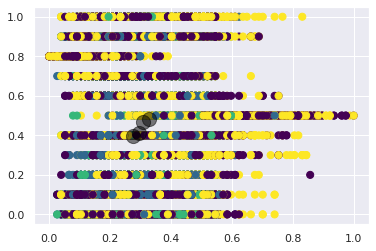

In [94]:
plt.scatter(df_minmax[ : , 0], df_minmax[ : , 1], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [95]:
# matrice des distance
pd.DataFrame(kmeans_minmax.transform(df_minmax))
# Inertie
kmeans_minmax.inertia_

30996.272645469413

*** For n_clusters = 2, inertia is 41690.14353743881 ***

*** For n_clusters = 3, inertia is 35041.07666563114 ***

*** For n_clusters = 4, inertia is 30996.272645469413 ***

*** For n_clusters = 5, inertia is 28875.244903950108 ***

*** For n_clusters = 6, inertia is 27330.14568419112 ***

*** For n_clusters = 7, inertia is 25674.793166595246 ***

*** For n_clusters = 8, inertia is 24519.00897005437 ***

*** For n_clusters = 9, inertia is 23501.189812376004 ***

*** For n_clusters = 10, inertia is 22616.01302318691 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

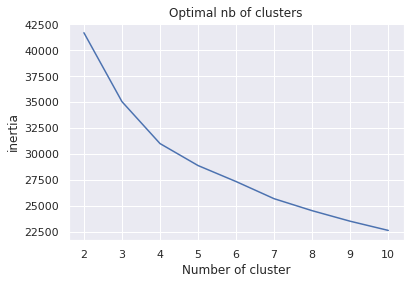

In [96]:
scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(df_minmax)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

In [97]:
from sklearn import metrics

# Utilisation de la métrique "silhouette"
# Faire varier le nombre de clusters de 2 à 10
scores = []
for k in range(2, 11):
    km = cluster.KMeans(n_clusters = k, random_state = 42)
    km.fit(df_minmax)
    score = metrics.silhouette_score(df_minmax, km.labels_)
    scores.append(score)
    print(f'*** For n_clusters={k}, The Silhouette Coefficient is {score} ***\n')

*** For n_clusters=2, The Silhouette Coefficient is 0.23477242715908175 ***

*** For n_clusters=3, The Silhouette Coefficient is 0.2561522213618974 ***

*** For n_clusters=4, The Silhouette Coefficient is 0.26548134567390935 ***

*** For n_clusters=5, The Silhouette Coefficient is 0.19948156661038446 ***

*** For n_clusters=6, The Silhouette Coefficient is 0.17777373103005306 ***

*** For n_clusters=7, The Silhouette Coefficient is 0.19951353336012878 ***

*** For n_clusters=8, The Silhouette Coefficient is 0.20378062716014633 ***

*** For n_clusters=9, The Silhouette Coefficient is 0.20635787063565028 ***

*** For n_clusters=10, The Silhouette Coefficient is 0.2044484788511431 ***



In [98]:
print(scores)

[0.23477242715908175, 0.2561522213618974, 0.26548134567390935, 0.19948156661038446, 0.17777373103005306, 0.19951353336012878, 0.20378062716014633, 0.20635787063565028, 0.2044484788511431]


Text(0.5, 1.0, 'Optimal nb of clusters')

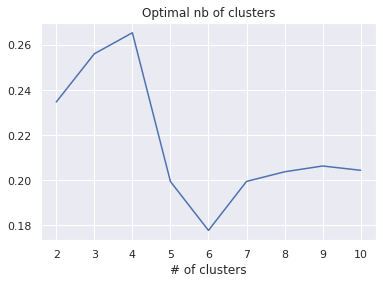

In [99]:
plt.figure()
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(range(2, 11, 1), scores)
plt.title("Optimal nb of clusters")

In [100]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [101]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [102]:
c10 = kmeans.labels_
c10

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)